In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Store filepath in a variable.
state_file = "../Datasets/State_Zhvi_AllHomes.csv"
county_file = "../Datasets/County_Zhvi_AllHomes.csv"
zip_code_file = "../Datasets/Zip_Zhvi_AllHomes.csv"

In [3]:
# Read our Data file with the pandas library, and create dataframes.
# The Zillow CSV files require ISO-8859-1 encoding.
state_data = pd.read_csv(state_file, encoding="ISO-8859-1")        # Zillow Home Value Index (ZHVI)
county_data = pd.read_csv(county_file, encoding="ISO-8859-1")      # Zillow Home Value Index (ZHVI)
zip_code_data = pd.read_csv(zip_code_file, encoding="ISO-8859-1")  # Zillow Home Value Index (ZHVI)

In [4]:
# Cleaning up zip code data
# Place the rows with San Diego County into a dataframe
zip_sd_county_row = zip_code_data.loc[zip_code_data["CountyName"] == "San Diego County", :]
del zip_sd_county_row['RegionID']
del zip_sd_county_row['State']
del zip_sd_county_row['Metro']
del zip_sd_county_row['CountyName']
zip_sd_county_row

# Set the index to be region name
sd_county_zips_index = zip_sd_county_row.set_index("RegionName")
sd_county_zips_index.head()

,City,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
RegionName,,,,,,,,,,,,,,,,,,,,,
91910,Chula Vista,119,163800.0,163500.0,163100.0,162700.0,162400.0,162300.0,162300.0,162500.0,...,525900,526500,526500,527500,531100,534200,535800,536500,536400,535700
92126,San Diego,183,153700.0,153200.0,152700.0,152100.0,151500.0,151000.0,150600.0,150300.0,...,588300,588100,589800,594200,598700,600600,602700,605800,607500,607100
91911,Chula Vista,197,143800.0,143500.0,143100.0,142700.0,142500.0,142300.0,142300.0,142400.0,...,474500,474200,474700,476600,479200,481100,483000,484900,486000,486200
92101,San Diego,230,147800.0,147800.0,147900.0,148100.0,148400.0,148800.0,149400.0,150000.0,...,594400,594500,594500,594200,594300,594700,595700,596400,595500,593800
92109,San Diego,231,209400.0,208400.0,207300.0,206200.0,205100.0,204000.0,203200.0,202700.0,...,943200,952100,958100,965000,974300,977400,974300,969400,964800,960300


In [5]:
# Find column index for desired date range start and end
start = sd_county_zips_index.columns.get_loc("2008-12")
end = sd_county_zips_index.columns.get_loc("2018-12")

# Make a new dataframe containing the 10 year range of data Dec 2008 - Dec 2018
# range_dates = sd_county_zips_index.iloc[:, start:end+1]
sd_county_zips_10yr_city_rank = pd.DataFrame(sd_county_zips_index, columns=["City", "SizeRank"])

sd_county_zips_10yr_date_range = sd_county_zips_index.iloc[:, start:end+1]

sd_county_zips_10yr = pd.merge(sd_county_zips_10yr_city_rank, sd_county_zips_10yr_date_range, on="RegionName")
sd_county_zips_10yr.index.names = ['Zip Code']
sd_county_zips_10yr

,City,SizeRank,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
Zip Code,,,,,,,,,,,,,,,,,,,,,
91910,Chula Vista,119,348100.0,342100.0,336200.0,329600.0,322400.0,314800.0,308500.0,304500.0,...,524100,525900,526500,526500,527500,531100,534200,535800,536500,536400
92126,San Diego,183,371900.0,370000.0,367600.0,364300.0,360400.0,356100.0,353500.0,353800.0,...,587400,588300,588100,589800,594200,598700,600600,602700,605800,607500
91911,Chula Vista,197,310300.0,304500.0,298700.0,292300.0,285400.0,278200.0,272100.0,268400.0,...,474300,474500,474200,474700,476600,479200,481100,483000,484900,486000
92101,San Diego,230,450000.0,447500.0,444100.0,439800.0,434800.0,430000.0,425300.0,421600.0,...,594000,594400,594500,594500,594200,594300,594700,595700,596400,595500
92109,San Diego,231,616500.0,616800.0,615800.0,613000.0,609600.0,606200.0,605200.0,608300.0,...,935800,943200,952100,958100,965000,974300,977400,974300,969400,964800
92021,El Cajon,257,334000.0,330400.0,326200.0,321000.0,315200.0,309500.0,305100.0,303000.0,...,479100,479500,478900,477900,478100,479900,480700,481500,483100,483900
92154,San Diego,445,303600.0,296900.0,290000.0,282200.0,273900.0,265400.0,258500.0,254400.0,...,460400,462300,463300,464600,467300,470900,473100,475000,477400,479000
92104,San Diego,446,364600.0,362600.0,360000.0,356500.0,352200.0,347800.0,344300.0,342300.0,...,616600,616600,614700,612300,612400,615600,617600,617500,616900,616800
92115,San Diego,453,339200.0,336400.0,333100.0,329200.0,324400.0,319400.0,315800.0,314800.0,...,527800,527400,526300,526100,526900,529000,531100,533600,536100,537200


In [6]:
# Make a dataframe for summary
summary_zips_base = pd.DataFrame(sd_county_zips_10yr, columns=["2008-12", "2018-12"])
summary_zips = summary_zips_base.rename(columns={"2008-12": "2008-Q4 Home Value", "2018-12": "2018-Q4 Home Value"})
summary_zips.index.names = ['Zip Code']
summary_zips["10-Yr Home Value Change"] = (summary_zips["2018-Q4 Home Value"] - summary_zips["2008-Q4 Home Value"])*100 / summary_zips["2008-Q4 Home Value"]

# Make a copy of the summary dataframe that is formatted for display
summary_zips_formatted = summary_zips.copy()
summary_zips_formatted["2008-Q4 Home Value"] = summary_zips_formatted["2008-Q4 Home Value"].map("${:,.0f}".format)
summary_zips_formatted["2018-Q4 Home Value"] = summary_zips_formatted["2018-Q4 Home Value"].map("${:,.0f}".format)
summary_zips_formatted["10-Yr Home Value Change"] = summary_zips_formatted["10-Yr Home Value Change"].map("{:.2f}%".format)
summary_zips_formatted.head()

,2008-Q4 Home Value,2018-Q4 Home Value,10-Yr Home Value Change
Zip Code,,,
91910,"$348,100","$536,400",54.09%
92126,"$371,900","$607,500",63.35%
91911,"$310,300","$486,000",56.62%
92101,"$450,000","$595,500",32.33%
92109,"$616,500","$964,800",56.50%


In [7]:
# Rank the 10 year zip code data by value change (%) descending
ranked_zips = summary_zips.sort_values(["10-Yr Home Value Change"], ascending=False)
ranked_zips.head()

# Make a copy of the sorted dataframe that is formatted for display
ranked_zips_formatted = ranked_zips.copy()
ranked_zips_formatted["2008-Q4 Home Value"] = ranked_zips_formatted["2008-Q4 Home Value"].map("${:,.0f}".format)
ranked_zips_formatted["2018-Q4 Home Value"] = ranked_zips_formatted["2018-Q4 Home Value"].map("${:,.0f}".format)
ranked_zips_formatted["10-Yr Home Value Change"] = ranked_zips_formatted["10-Yr Home Value Change"].map("{:.2f}%".format)
ranked_zips_formatted.head()

,2008-Q4 Home Value,2018-Q4 Home Value,10-Yr Home Value Change
Zip Code,,,
92007,"$718,400","$1,300,400",81.01%
91932,"$337,200","$605,500",79.57%
92116,"$366,700","$641,300",74.88%
92113,"$235,900","$406,300",72.23%
92104,"$364,600","$616,800",69.17%


In [8]:
# Take the top 10 highest appreciation rates and put them in a dataframe
top_10_df = ranked_zips.iloc[0:10, :]

# Merge top_10_df with sd_county_zips_10yr to get 10yr monthly data for the top 10
top_10_all_months = pd.merge(top_10_df, sd_county_zips_10yr, how='left', on = ['Zip Code'])
del top_10_all_months['2008-Q4 Home Value']
del top_10_all_months['2018-Q4 Home Value']
del top_10_all_months['10-Yr Home Value Change']
del top_10_all_months['City']
del top_10_all_months['SizeRank']
top_10_all_months

,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
Zip Code,,,,,,,,,,,,,,,,,,,,,
92007,718400.0,715200.0,711800.0,707400.0,702000.0,696400.0,694400.0,697700.0,705000.0,712600.0,...,1281700,1285800,1280300,1275200,1280000,1291100,1296400,1296300,1296900,1300400
91932,337200.0,331500.0,325300.0,317600.0,309100.0,300600.0,293400.0,288000.0,283900.0,280300.0,...,590500,594300,595300,595000,595600,598800,601800,604200,605800,605500
92116,366700.0,364900.0,362700.0,359900.0,356300.0,352300.0,349900.0,350400.0,352700.0,355400.0,...,626000,628200,628000,625600,624800,627200,630500,634700,639100,641300
92113,235900.0,226200.0,216500.0,205900.0,194600.0,183100.0,173200.0,166300.0,162200.0,159800.0,...,393800,395300,396700,398100,400400,403200,404400,405000,406000,406300
92104,364600.0,362600.0,360000.0,356500.0,352200.0,347800.0,344300.0,342300.0,341100.0,340300.0,...,616600,616600,614700,612300,612400,615600,617600,617500,616900,616800
91950,258400.0,251300.0,244100.0,236200.0,227900.0,219700.0,212900.0,208700.0,206800.0,206400.0,...,418400,419300,418900,418300,418400,419300,421400,425000,427900,428900
92105,262400.0,256200.0,249700.0,242300.0,234300.0,226400.0,220000.0,216000.0,213800.0,212300.0,...,417100,416200,415200,414300,414800,417900,422800,428100,432300,434800
92102,280600.0,273600.0,266200.0,257600.0,248400.0,239500.0,231600.0,226100.0,222400.0,219600.0,...,437300,438300,438600,438700,440800,445300,450500,455500,460100,462400
92114,277500.0,270300.0,263300.0,255500.0,246900.0,238100.0,231200.0,227800.0,226900.0,227100.0,...,445800,445900,444400,443900,444800,447000,449300,451400,453000,453900


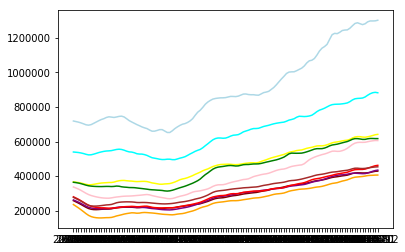

In [9]:
# De-index top_10_all_months
top_10_all_months_noIndex = top_10_all_months.copy()
top_10_all_months_noIndex.reset_index(inplace=True)

# Collect the months where data was collected
months = top_10_all_months.keys()

# Plot top 10 monthly data as layered line graph
top_1_list = top_10_all_months.iloc[0,:]
top_1_zip = plt.plot(months, top_1_list, color="lightblue",label=top_10_all_months_noIndex.iloc[0,0])

top_2_list = top_10_all_months.iloc[1,:]
top_2_zip = plt.plot(months, top_2_list, color="pink",label=top_10_all_months_noIndex.iloc[1,0])

top_3_list = top_10_all_months.iloc[2,:]
top_3_zip = plt.plot(months, top_3_list, color="yellow",label=top_10_all_months_noIndex.iloc[2,0])

top_4_list = top_10_all_months.iloc[3,:]
top_4_zip = plt.plot(months, top_4_list, color="orange",label=top_10_all_months_noIndex.iloc[3,0])

top_5_list = top_10_all_months.iloc[4,:]
top_5_zip = plt.plot(months, top_5_list, color="green",label=top_10_all_months_noIndex.iloc[4,0])

top_6_list = top_10_all_months.iloc[5,:]
top_6_zip = plt.plot(months, top_6_list, color="maroon",label=top_10_all_months_noIndex.iloc[5,0])

top_7_list = top_10_all_months.iloc[6,:]
top_7_zip = plt.plot(months, top_7_list, color="purple",label=top_10_all_months_noIndex.iloc[6,0])

top_8_list = top_10_all_months.iloc[7,:]
top_8_zip = plt.plot(months, top_8_list, color="red",label=top_10_all_months_noIndex.iloc[7,0])

top_9_list = top_10_all_months.iloc[8,:]
top_9_zip = plt.plot(months, top_9_list, color="brown",label=top_10_all_months_noIndex.iloc[8,0])

top_10_list = top_10_all_months.iloc[9,:]
top_10_zip = plt.plot(months, top_10_list, color="aqua",label=top_10_all_months_noIndex.iloc[9,0])

In [10]:
# Place the row with CA into a variable
ca_row = state_data.loc[state_data["RegionName"] == "California", :]
del ca_row['RegionID']
del ca_row['SizeRank']
# Set the index to be region name
ca_row_index = ca_row.set_index("RegionName")
# Convert the df to a list to be used for plotting
ca_row_index_list = ca_row_index.iloc[0,:]


# Place the row with SD County into a variable
sd_row = county_data.loc[county_data["RegionName"] == "San Diego County", :]
del sd_row['State']
del sd_row['Metro']
del sd_row['StateCodeFIPS']
del sd_row['MunicipalCodeFIPS']
del sd_row['RegionID']
del sd_row['SizeRank']
# Set the index to be region name
sd_row_index = sd_row.set_index("RegionName")
# Convert the df to a list to be used for plotting
sd_row_index_list = sd_row_index.iloc[0,:]


# Place the rows with **highest appreciation rate** into a variable
  # find the first zip code using it's index
highest_app_zip = top_10_all_months_noIndex.iloc[0,0]
  # get the info for the first row
zip_high_row = zip_code_data.loc[zip_code_data["RegionName"] == highest_app_zip, :]
del zip_high_row['City']
del zip_high_row['State']
del zip_high_row['Metro']
del zip_high_row['CountyName']
del zip_high_row['RegionID']
del zip_high_row['SizeRank']
# Set the index to be region name
zip_high_row_index = zip_high_row.set_index("RegionName")
# Convert the df to a list to be used for plotting
zip_high_row_index_list = zip_high_row_index.iloc[0,:]


# Place the rows with **lowest appreciation rate** into a variable
  # find the length of the ranked zip codes
lowest_app_index_num = (len(ranked_zips))-1
  # De-index ranked_zips
ranked_zips_noIndex = ranked_zips.copy()
ranked_zips_noIndex.reset_index(inplace=True)
  # find the last zip code using it's index
lowest_app_zip = ranked_zips_noIndex.iloc[lowest_app_index_num,0]
  # get the info for the last row
zip_low_row = zip_code_data.loc[zip_code_data["RegionName"] == lowest_app_zip, :]
del zip_low_row['City']
del zip_low_row['State']
del zip_low_row['Metro']
del zip_low_row['CountyName']
del zip_low_row['RegionID']
del zip_low_row['SizeRank']
# Set the index to be region name
zip_low_row_index = zip_low_row.set_index("RegionName")
# Convert the df to a list to be used for plotting
zip_low_row_index_list = zip_low_row_index.iloc[0,:]


# ----------------------------------------------------------------------------------------------

# Get list of column names
column_names = list(ca_row_index.columns.values)
# Create empty dataframe
state_county_zip = pd.DataFrame(columns=column_names)

# Add our data rows to the empty dataframe 
state_county_zip = state_county_zip.append(ca_row_index)
state_county_zip = state_county_zip.append(sd_row_index)
state_county_zip = state_county_zip.append(zip_high_row_index)
state_county_zip = state_county_zip.append(zip_low_row_index)

# Show DF
state_county_zip.head()

# ----------------------------------------------------------------------------------------------

# # Find column index for desired date range start and end
# start = state_county_zip_index.columns.get_loc("2008-12")
# end = state_county_zip_index.columns.get_loc("2018-12")

# # Make a new dataframe containing the 10 year range of data Dec 2008 - Dec 2018
# state_county_zip_10yr = state_county_zip_index.iloc[:, start:end+1]
# state_county_zip_10yr

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
California,163000.0,162700.0,162300.0,162000.0,161800.0,161700.0,161600.0,161700.0,161900.0,162200.0,...,536700,538700,541000,542700,544100,545100,546200,547300,547900,548100
San Diego County,163600.0,163200.0,162800.0,162400.0,162100.0,162000.0,162100.0,162200.0,162700.0,163400.0,...,583600,583700,584300,586000,588700,590400,591700,592600,592500,591400
92007,214300.0,215400.0,216500.0,217800.0,219100.0,220500.0,222200.0,223900.0,226200.0,228800.0,...,1285800,1280300,1275200,1280000,1291100,1296400,1296300,1296900,1300400,1302400
92004,113200.0,113100.0,113100.0,113100.0,113100.0,113100.0,113200.0,113400.0,113600.0,113900.0,...,212400,213700,215900,217800,218700,217900,217500,217200,216300,213900


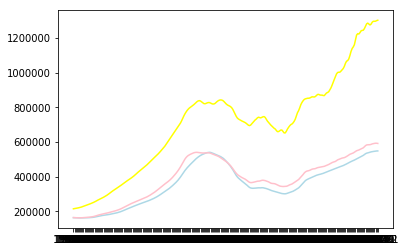

In [11]:
# Collect the months where data was collected
months = state_county_zip.keys()

# Plot highest zip appreciation rate compared to county and state -- monthly data as layered line graph
ca_line = plt.plot(months, ca_row_index_list, color="lightblue",label="California")

sd_line = plt.plot(months, sd_row_index_list, color="pink",label="San Diego")

top_line = plt.plot(months, zip_high_row_index_list, color="yellow",label=zip_high_row.iloc[0,0])

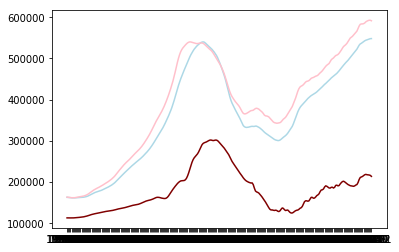

In [12]:
# Plot lowest zip appreciation rate compared to county and state -- monthly data as layered line graph
ca_line = plt.plot(months, ca_row_index_list, color="lightblue",label="California")

sd_line = plt.plot(months, sd_row_index_list, color="pink",label="San Diego")

low_line = plt.plot(months, zip_low_row_index_list, color="maroon",label=zip_low_row.iloc[0,0])